<a href="https://colab.research.google.com/github/vince82/New_Project/blob/main/ACP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
file_path = '/content/drive/My Drive/ML_project/decathlon.csv'
df = pd.read_csv(file_path)

# **Explorons les données**

In [5]:
df.head()

,Athlets,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
0,SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
1,CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
2,KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
3,BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
4,YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar


In [13]:
df.describe()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,10.998049,7.260000,14.477073,1.976829,49.616341,14.605854,44.325610,4.762439,58.316585,279.024878,12.121951,8005.365854
std,0.263023,0.316402,0.824428,0.088951,1.153451,0.471789,3.377845,0.278000,4.826820,11.673247,7.918949,342.385145
min,10.440000,6.610000,12.680000,1.850000,46.810000,13.970000,37.920000,4.200000,50.310000,262.100000,1.000000,7313.000000
25%,10.850000,7.030000,13.880000,1.920000,48.930000,14.210000,41.900000,4.500000,55.270000,271.020000,6.000000,7802.000000
50%,10.980000,7.300000,14.570000,1.950000,49.400000,14.480000,44.410000,4.800000,58.360000,278.050000,11.000000,8021.000000
75%,11.140000,7.480000,14.970000,2.040000,50.300000,14.980000,46.070000,4.920000,60.890000,285.100000,18.000000,8122.000000
max,11.640000,7.960000,16.360000,2.150000,53.200000,15.670000,51.650000,5.400000,70.520000,317.000000,28.000000,8893.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Athlets      41 non-null     object 
 1   100m         41 non-null     float64
 2   Long.jump    41 non-null     float64
 3   Shot.put     41 non-null     float64
 4   High.jump    41 non-null     float64
 5   400m         41 non-null     float64
 6   110m.hurdle  41 non-null     float64
 7   Discus       41 non-null     float64
 8   Pole.vault   41 non-null     float64
 9   Javeline     41 non-null     float64
 10  1500m        41 non-null     float64
 11  Rank         41 non-null     int64  
 12  Points       41 non-null     int64  
 13  Competition  41 non-null     object 
dtypes: float64(10), int64(2), object(2)
memory usage: 4.6+ KB


In [15]:
# Separons la colonne label Class du dataFrame (axis = 1 --> une colonne) avant la standarrization vu que cela va changer les donnnee deja equailibrer est bonnes dans la colonne cible
y = df['Competition']
X = df.drop("Competition", axis =1)


In [16]:
# Obtenons les valeurs uniques de la colonne cible
valeur_unique = df["Competition"].unique()

# Affichons les valeurs uniques
print("Valeurs uniques de la classe à prédire :")
print(valeur_unique)

Valeurs uniques de la classe à prédire :
['Decastar' 'OlympicG']


# **Standardisons les données**

In [17]:
from sklearn.preprocessing import StandardScaler

# Initialisons le StandardScaler
scaler = StandardScaler()

# Appliquons la mise à l'échelle (fit et transform) aux données
x_scal = X.iloc[:, 1:11]
scaled_X = scaler.fit_transform(x_scal)
# Convertissons le résultat en DataFrame pour une meilleure lisibilité
scaled_X = pd.DataFrame(scaled_X, columns=x_scal.columns)

# Affichons les données mises à l'échellex
scaled_X


,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
0,0.161478,1.023937e+00,0.433405,1.060457,0.169981,0.180572,-0.172524,0.937988,1.022196,1.099316
1,-0.916293,4.479724e-01,-0.266573,-1.329735,-0.216222,-1.192819,1.916555,0.573807,0.384558,1.949271
2,0.084494,1.279921e-01,0.359723,0.719001,-1.093956,-1.106982,1.386043,0.573807,-1.679377,1.836522
3,0.084494,-9.599408e-02,-0.278853,-0.646823,-0.602425,0.824348,-1.035731,2.030532,0.934101,0.093246
4,1.316232,-5.439665e-01,0.875496,1.401913,0.705398,1.511044,0.579784,-0.154555,1.074633,-0.227656
5,0.430920,1.087933e+00,-0.205171,0.036089,-0.821859,-0.806553,-0.966794,0.573807,-1.373143,-0.080215
6,0.507904,1.279921e-01,-1.224437,0.377545,-0.874523,-0.935308,0.402947,-1.247098,-0.618045,-0.956190
7,-0.646850,1.599901e-01,-0.880588,1.743369,0.257754,-0.484665,0.025294,-1.247098,-0.408295,0.526896
8,2.470986,-1.439911e+00,0.114117,-0.305367,0.459633,0.695593,0.981415,0.573807,-1.255683,-1.467898
9,1.431707,9.599408e-01,-0.082368,-1.329735,1.302257,0.974563,0.199134,0.209626,-0.236301,0.526896


<Axes: >

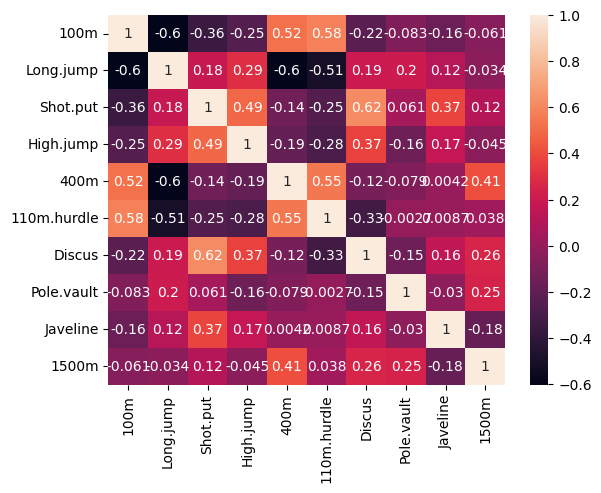

In [28]:
sns.heatmap(scaled_X.corr(), annot=True)

# **Réalisons l’ACP**

**L'ACP (Analyse en Composantes Principales) est une technique utilisée pour réduire la dimensionnalité des données tout en préservant l'information essentielle, facilitant ainsi l'analyse et la visualisation.**

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(scaled_X)

#Affichons et expliquons chaque composant
for i, variance in enumerate(pca.explained_variance_ratio_):
    print(f'Variance expliquee par le composant {i + 1}: {variance * 100:.2f}%')


Variance expliquee par le composant 1: 32.72%
Variance expliquee par le composant 2: 17.37%
Variance expliquee par le composant 3: 14.05%
Variance expliquee par le composant 4: 10.57%
Variance expliquee par le composant 5: 6.85%
Variance expliquee par le composant 6: 5.99%
Variance expliquee par le composant 7: 4.51%
Variance expliquee par le composant 8: 3.97%
Variance expliquee par le composant 9: 2.15%
Variance expliquee par le composant 10: 1.82%


Variance expliquée par chaque composante : [0.32719055 0.1737131  0.14049167 0.10568504 0.06847735 0.05992687
 0.04512353 0.03968766 0.02148149 0.01822275]


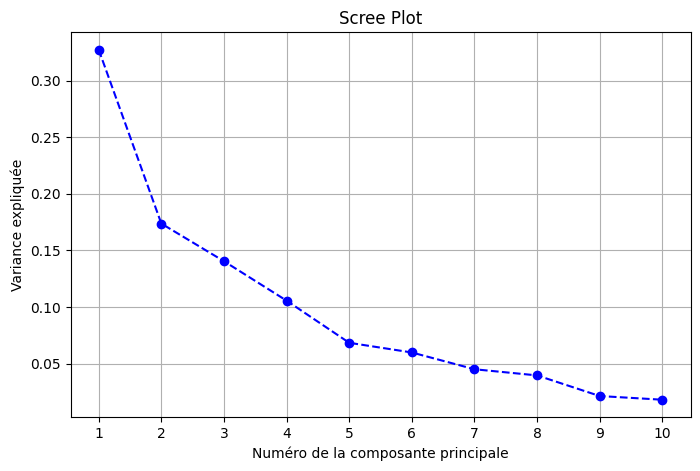

In [53]:
# Récupérer les valeurs propres (variance expliquée par chaque composante)
explained_variance = pca.explained_variance_ratio_

# Afficher la variance expliquée par chaque axe
print(f'Variance expliquée par chaque composante : {explained_variance}')


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.title('Scree Plot')
plt.xlabel('Numéro de la composante principale')
plt.ylabel('Variance expliquée')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()


In [54]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)

[0.32719055 0.50090366 0.64139532 0.74708036 0.81555771 0.87548458
 0.92060811 0.96029577 0.98177725 1.        ]


# **Représentez les valeurs propres en utilisant des diagrammes de bâto**

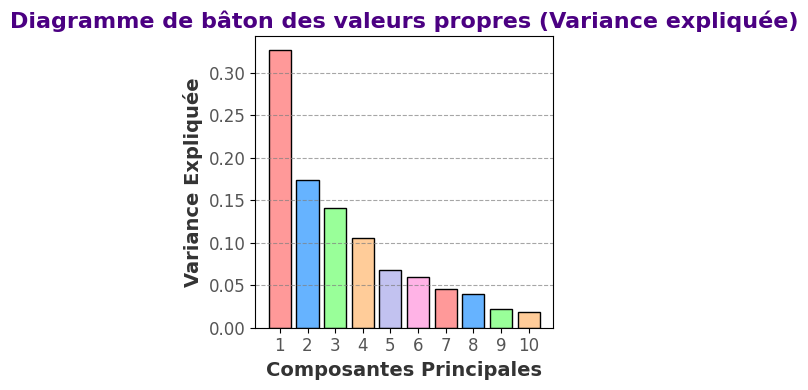

In [55]:
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']
components = np.arange(1, len(explained_variance) + 1)
plt.figure(figsize=(4, 4))
plt.bar(components, explained_variance, color=colors[:len(explained_variance)], edgecolor='black')
plt.xlabel('Composantes Principales', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Variance Expliquée', fontsize=14, fontweight='bold', color='#333333')
plt.title('Diagramme de bâton des valeurs propres (Variance expliquée)', fontsize=16, fontweight='bold', color='#4b0082')
plt.xticks(components, fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.7)
plt.tight_layout()
plt.show()

In [66]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_X)
df = pd.DataFrame(pca.components_, columns=list(x_scal.columns))
df


,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
0,0.428296,-0.410152,-0.344144,-0.316194,0.375716,0.412554,-0.305426,-0.027831,-0.153198,0.032107
1,0.141989,-0.262079,0.453947,0.265776,0.432046,0.173591,0.460024,-0.136841,0.240507,0.359805


In [62]:
# Calculer les charges
loadings = (np.sqrt(pca.explained_variance_) * pca.components_.T)

# Créer un DataFrame pour représenter les charges sous forme de tableau
loadings_df = pd.DataFrame(loadings,
                            columns=[f'Composant {i+1}' for i in range(loadings.shape[1])],
                            index=df.columns)  # Utiliser les noms de variables réels du jeu de données

# Afficher la variance expliquée
explained_variance = pca.explained_variance_ratio_
print("Variance expliquée par chaque composant:")
for i, var in enumerate(explained_variance, start=1):
    print(f"Composant {i}: {var:.2%}")

# Afficher le tableau des charges
print("\nCharges:")
print(loadings_df)


Variance expliquée par chaque composant:
Composant 1: 32.72%
Composant 2: 17.37%

Charges:
             Composant 1  Composant 2
100m            0.784344     0.189467
Long.jump      -0.751116    -0.349712
Shot.put       -0.630236     0.605736
High.jump      -0.579050     0.354645
400m            0.688053     0.576512
110m.hurdle     0.755516     0.231636
Discus         -0.559330     0.613846
Pole.vault     -0.050967    -0.182597
Javeline       -0.280553     0.320927
1500m           0.058799     0.480115


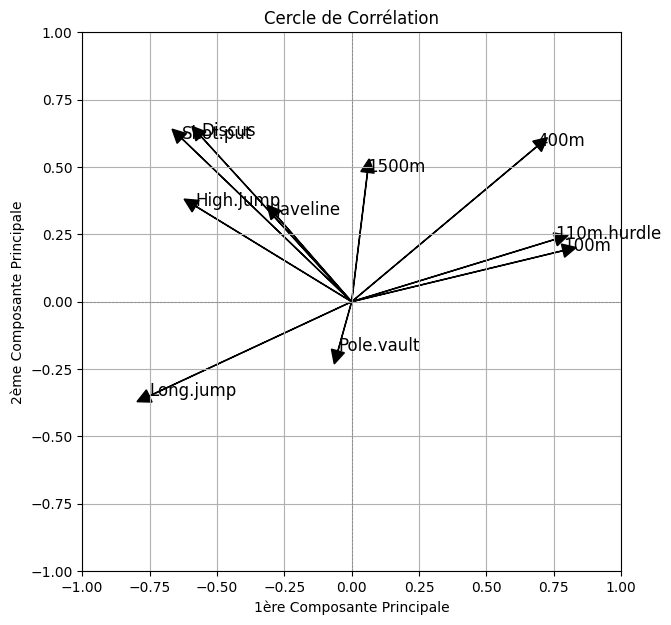

In [24]:
# Tracer les cercles de corrélation
plt.figure(figsize=(7, 7))

# Tracer des flèches pour les charges
for i in range(loadings.shape[0]):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], head_width=0.05, head_length=0.05, fc='k', ec='k')

# Définir les limites des axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Dessiner des lignes horizontales et verticales à 0
plt.axhline(0, color='gray', lw=0.5, ls='--')
plt.axvline(0, color='gray', lw=0.5, ls='--')

# Ajouter des étiquettes pour chaque variable
for i in range(loadings.shape[0]):
    plt.text(loadings[i, 0], loadings[i, 1], x_scal.columns[i], fontsize=12)

# Titre et étiquettes
plt.title("Cercle de Corrélation")
plt.xlabel("1ère Composante Principale")
plt.ylabel("2ème Composante Principale")
plt.grid()

# Définir le rapport d'aspect pour qu'il soit égal
plt.gca().set_aspect('equal', adjustable='box')
# Afficher le graphique
plt.show()




In [25]:
df

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
0,0.428296,-0.410152,-0.344144,-0.316194,0.375716,0.412554,-0.305426,-0.027831,-0.153198,0.032107
1,0.141989,-0.262079,0.453947,0.265776,0.432046,0.173591,0.460024,-0.136841,0.240507,0.359805


In [6]:
# plt.figure(figsize=(8, 6))

# # Scatter plot to show athletes by their rank and points, colored by competition
# sns.scatterplot(data=df, x='Points', y='Rank', hue='Competition', palette='coolwarm', s=150, marker='o', edgecolor='black', alpha=0.7)

# # Add labels and title with custom font sizes and bold font weight
# plt.xlabel('Points', fontsize=14, fontweight='bold', color='darkblue')
# plt.ylabel('Rank', fontsize=14, fontweight='bold', color='darkblue')
# plt.title('Visualisation des Athlètes par Points, Rang et Compétition', fontsize=16, fontweight='bold', color='purple')

# # Invert y-axis to make the 1st rank appear on top
# plt.gca().invert_yaxis()

# # Customize ticks for better readability
# plt.xticks(fontsize=12, color='gray')
# plt.yticks(fontsize=12, color='gray')

# # Add gridlines for better visualization
# plt.grid(True, which='both', axis='both', linestyle='--', color='gray', alpha=0.3)

# # Show plot with tighter layout
# plt.tight_layout()
# plt.show()

# # Identify winning profiles (Rank = 1 in each competition)
# winners = df[df['Rank'] == 1]
# print("Athlètes ayant gagné leur compétition :")
# print(winners[['Athlets', 'Competition', 'Points']])


In [35]:
df1 = pd.read_csv(file_path)
df1.head()

,Athlets,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
0,SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
1,CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
2,KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
3,BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
4,YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar


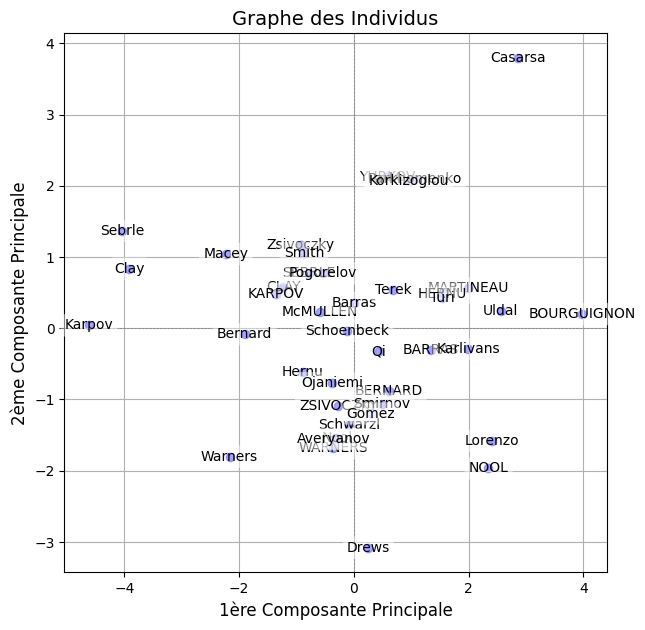

In [82]:
import matplotlib.pyplot as plt


df = pd.read_csv(file_path)
# Tracer le graphe des individus
plt.figure(figsize=(7, 7))  # Increased size for better visibility
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='blue', alpha=0.7)  # Adjust alpha for point visibility

# Ajouter des étiquettes pour chaque individu
for i in range(X_pca.shape[0]):
    plt.text(X_pca[i, 0], X_pca[i, 1], df['Athlets'].iloc[i],
             fontsize=10, ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))

# Ajouter les titres et les labels
plt.title('Graphe des Individus', fontsize=14)
plt.xlabel('1ère Composante Principale', fontsize=12)
plt.ylabel('2ème Composante Principale', fontsize=12)

plt.grid()
plt.axhline(0, color='gray', lw=0.5, ls='--')
plt.axvline(0, color='gray', lw=0.5, ls='--')

# Afficher le graphe
plt.show()




   Athlets   100m  Long.jump  Shot.put  High.jump   400m  110m.hurdle  Discus  \
0   SEBRLE  11.04       7.58     14.83       2.07  49.81        14.69   43.75   
13  Sebrle  10.85       7.84     16.36       2.12  48.36        14.05   48.72   

    Pole.vault  Javeline   1500m  Rank  Points Competition  
0         5.02     63.19  291.70     1    8217    Decastar  
13        5.00     70.52  280.01     1    8893    OlympicG  


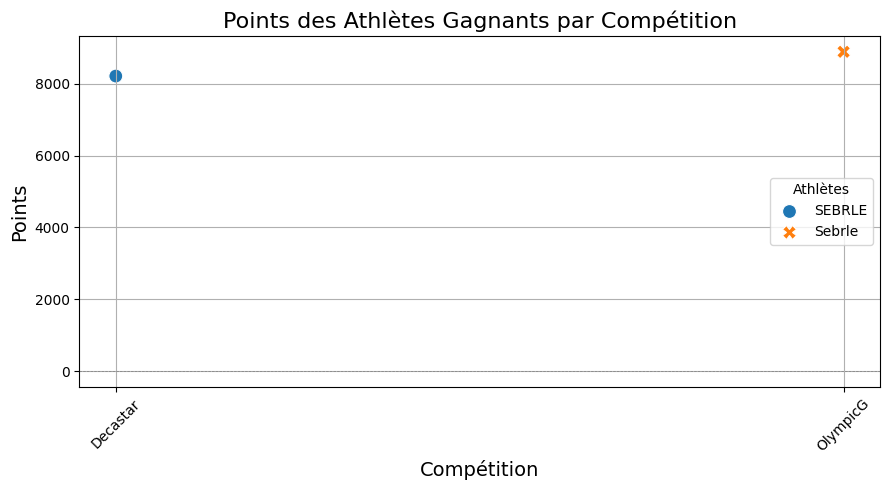

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identification des athlètes gagnants (Rank = 1 dans chaque compétition)
winners = df1[df1['Rank'] == 1]

# Vérification si winners contient des données
print(winners)

# Visualisation des points par compétition
plt.figure(figsize=(9, 5))
sns.scatterplot(data=winners, x='Competition', y='Points', hue='Athlets', style='Athlets', s=100)

# Ajouter des lignes horizontales pour chaque rang
plt.axhline(0, color='gray', lw=0.5, ls='--')

# Personnaliser le graphique
plt.title("Points des Athlètes Gagnants par Compétition", fontsize=16)
plt.xlabel("Compétition", fontsize=14)
plt.ylabel("Points", fontsize=14)
plt.xticks(rotation=45)
plt.grid()

# Afficher le graphique
plt.legend(title='Athlètes')
plt.tight_layout()
plt.show()


